In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("./dataset.csv", parse_dates=['ScheduledDay', 'AppointmentDay'])



In [3]:
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [29]:
y = LabelEncoder().fit_transform(data["No-show"])



X = data[["Age", "Scholarship",	"Hipertension",	"Diabetes",	"Alcoholism",	"Handcap",	"SMS_received"]]

#add number of days between scheduled and actual date as a new feature
X['AppointmentTime'] = (data['AppointmentDay']-data['ScheduledDay']).dt.days
X['AppointmentTime'] = X['AppointmentTime'].apply(lambda x: np.maximum(x, 0))

#add a new label indication if the appointmentDay is weekend or not

X['Appointment_on_weekend'] = (data['AppointmentDay'].dt.dayofweek).isin([5, 6]).astype(int)


#one hot encode gender
X = pd.concat([X, pd.get_dummies(data['Gender']).astype(np.float32)], axis=1)

X['Age']= StandardScaler().fit_transform(X[['Age']])
X.head()

y = y.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
X_train = X_train.to_numpy()
X_test= X_test.to_numpy()


C:\Users\SUDARSHAN\AppData\Local\Temp\ipykernel_25344\1234179744.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AppointmentTime'] = (data['AppointmentDay']-data['ScheduledDay']).dt.days
C:\Users\SUDARSHAN\AppData\Local\Temp\ipykernel_25344\1234179744.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AppointmentTime'] = X['AppointmentTime'].apply(lambda x: np.maximum(x, 0))
C:\Users\SUDARSHAN\AppData\Local\Temp\ipykernel_25344\1234179744.py:13: SettingWithCopyWarning: 
A value is trying to be se

In [30]:
X

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentTime,Appointment_is_weekend,F,M
0,1.077932,0,1,0,0,0,0,0,0,1.0,0.0
1,0.818306,0,0,0,0,0,0,0,0,0.0,1.0
2,1.077932,0,0,0,0,0,0,0,0,1.0,0.0
3,-1.258708,0,0,0,0,0,0,0,0,1.0,0.0
4,0.818306,0,1,1,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
110522,0.818306,0,0,0,0,0,1,34,0,1.0,0.0
110523,0.601950,0,0,0,0,0,1,34,0,1.0,0.0
110524,-0.696184,0,0,0,0,0,1,40,0,1.0,0.0
110525,0.039425,0,0,0,0,0,1,40,0,1.0,0.0


In [12]:
from main import Sequential, Dense
model = Sequential([
    Dense(16),
    Dense(8),
    Dense(4),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_cross_entropy')
model.build(X.shape[1])

In [14]:
y_pred = model.predict(X_test)
from main import accuracy
accuracy(y_pred>=0.5, y_test)


np.float64(0.2621912602913236)

In [15]:
(train_loss, train_accuracy), (test_loss, test_accuracy) = model.fit(X_train, y_train, epochs=10, learning_rate=1e-3, X_test=X_test, y_test=y_test)

Epoch: 1, time taken: 1.8096518516540527, accuracy=0.7548766197959746, binary_cross_entropy loss=0.6412221778213215
Epoch: 2, time taken: 1.7909064292907715, accuracy=0.7980769230769231, binary_cross_entropy loss=0.49720585283074087
Epoch: 3, time taken: 2.0726702213287354, accuracy=0.7983612489660876, binary_cross_entropy loss=0.47353502904345607
Epoch: 4, time taken: 2.101698875427246, accuracy=0.7984215605183347, binary_cross_entropy loss=0.4679061020548843
Epoch: 5, time taken: 2.1461379528045654, accuracy=0.7984344844223876, binary_cross_entropy loss=0.4659995806069851
Epoch: 6, time taken: 1.9178686141967773, accuracy=0.7984431003584229, binary_cross_entropy loss=0.4649751082417639
Epoch: 7, time taken: 2.121833086013794, accuracy=0.7984344844223876, binary_cross_entropy loss=0.46427757884047305
Epoch: 8, time taken: 2.0546774864196777, accuracy=0.7984387923904053, binary_cross_entropy loss=0.4637220737956474
Epoch: 9, time taken: 2.1435556411743164, accuracy=0.7984301764543701, 

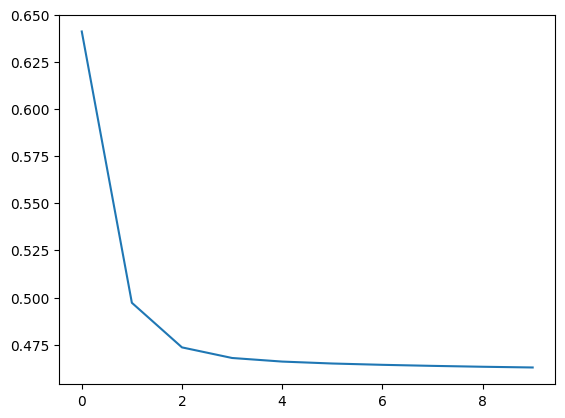

In [16]:
# model.fit(X_train, y_train, epochs=500, learning_rate=1e-2)
plt.plot(train_loss)
# plt.plot(train_accuracy)

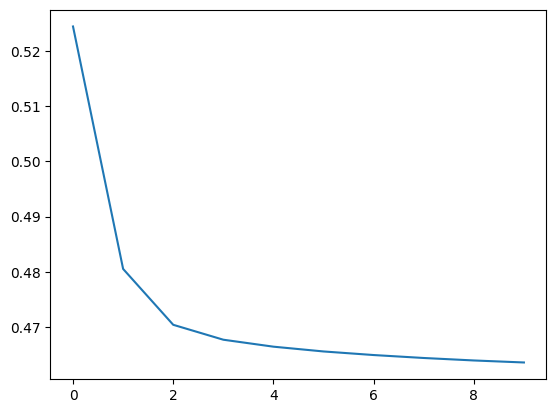

In [17]:
plt.plot(test_loss)
# plt.plot(test_accuracy)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from main import accuracy, calculate_f1, calculate_precision, calculate_recall
accuracy(y_pred>=0.5, y_test)

np.float64(0.7972194577641063)

In [20]:
calculate_precision(y_pred>=0.5, y_test)

C:\Users\SUDARSHAN\Desktop\Coding Related files\CSOC\vanilla_neural_networks\main.py:55: RuntimeWarning: invalid value encountered in scalar divide
  return (TP)/(TP+FP)


np.float64(nan)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve


In [22]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


In [26]:
f1 = 2*precision*recall/(precision+recall+1e-9)

In [28]:
# plt.plot(thresholds, f1[:-1])
np.max(f1)

np.float64(0.43656283698539217)